<h2>Import packages and data</h2>

In [1]:
from scipy.io import netcdf
import similarity_measures as sim
import calculations as calc
import comparing as comp
import combining as comb
import plots
import numpy as np
import matplotlib as plt

In [2]:
nc_l30 = netcdf.netcdf_file("data/era-int_pl_1979-2019-mm-l30-u.nc")

<h2>Derive QBO</h2>

In [3]:
lon = calc.convert_coordinates_to_grid(nc_l30.variables["longitude"][:], 180)
lat = calc.convert_coordinates_to_grid(nc_l30.variables["latitude"][:], 0)

lon_step = 256 #Around the whole equator
lat_step = calc.convert_coordinates_to_grid(nc_l30.variables["latitude"][:], 0) - calc.convert_coordinates_to_grid(nc_l30.variables["latitude"][:], 5)


u_l30 = nc_l30.variables["u"]

#Deseasonalize
u_l30 = calc.deseasonalize_map(u_l30)

qbo_equator = calc.derive(u_l30[:, :, :, :], lat, lon, 0, lat_step, lon_step)

In [4]:
plt.rcParams.update({'font.size': 25})

<h1>Standard Deviation similarity values</h1>

In [5]:
measures = [sim.pearson_correlation_abs, sim.mutual_information]

In [6]:
measure_labels = ["Absolute Pearson's Correlation", "Mutual Information"]

In [7]:
print(plots.plot_std_between_similarity_measures.__doc__)


    Plot 3 maps with the standard deviation between all similarity values, using a list of similarity measures,
    between the reference series and the time series for each point.

    First map contains the points where all the similarity values have high values, second map containts the points
    where all the similarity values have low values and the third map containts all the remaining points.

    Args:
        map_array (numpy.ndarray): Map with 4 dimensions - time, level, latitude, longitude
        reference_series (numpy.ndarray): 1 dimensional reference series
        measures (list): List of similarity measures to compute similarity between two time series
        measure_labels (list): List of labels for the measures
        threshold (float64, optional): Percentage-Threshold to decide when a value is high, low, or between
            Defaults to 0.35 (35%)
        scaling_func (function, optional): Function that takes a map of similarity values and scales them in order

C:\Users\tousp\OneDrive\KIT\6. Semester\Bachelorarbeit\Climate-Similarity-Metrics\plots.py:733: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m = Basemap(projection='mill', lon_0=30, resolution='l', ax=axis)


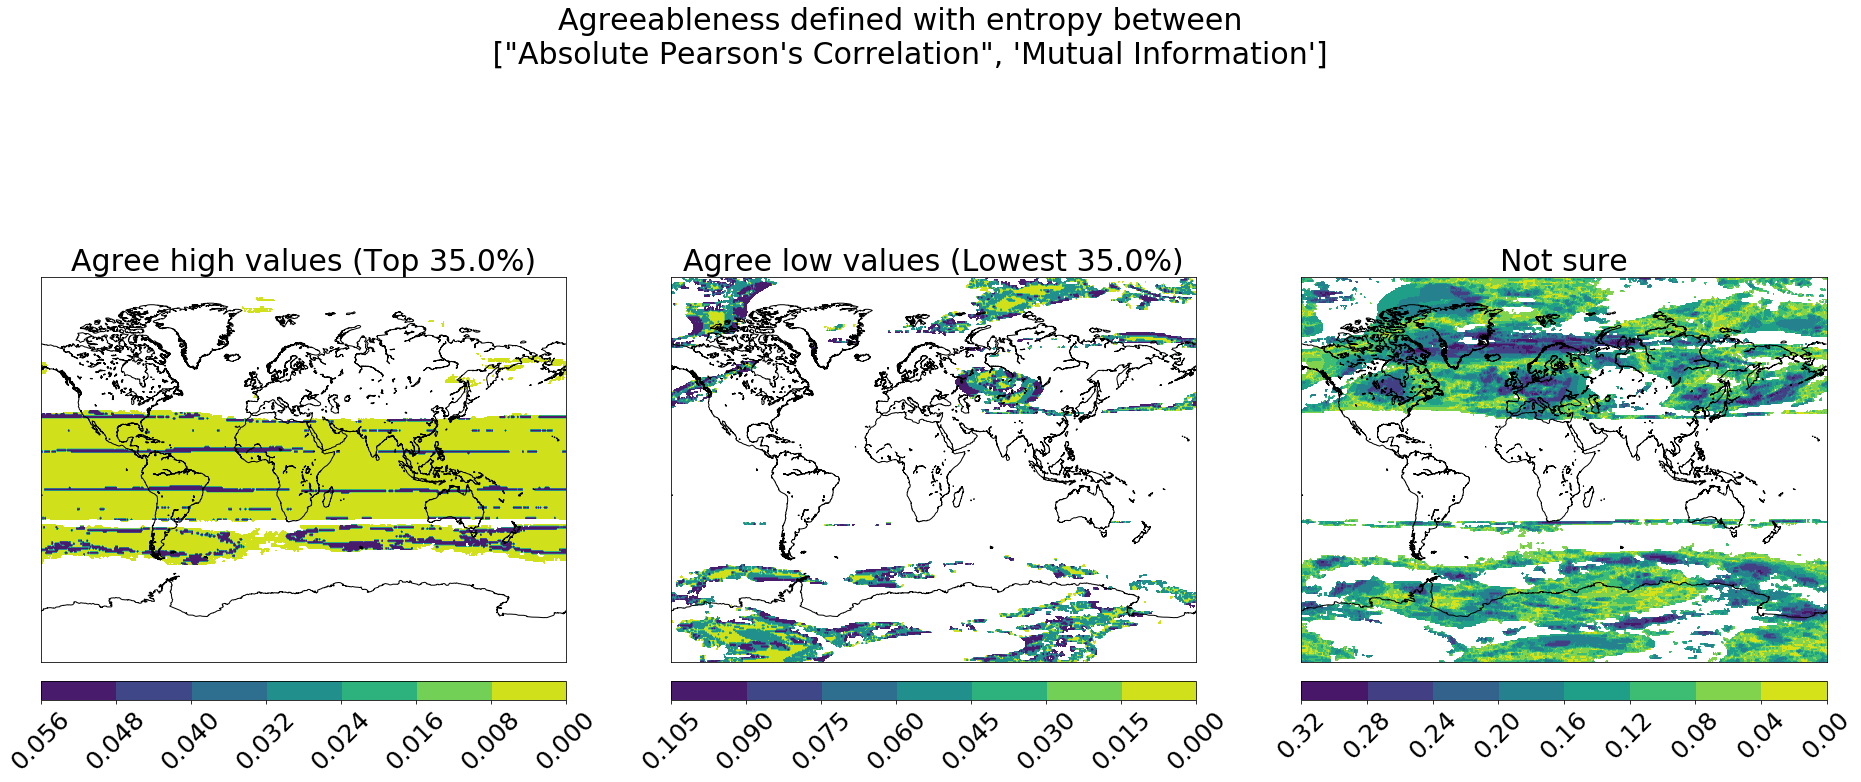

In [8]:
plots.plot_std_between_similarity_measures(u_l30, qbo_equator, measures, measure_labels)

<h1>Entropy between similarity values</h1>

In [9]:
print(plots.plot_entropy_between_similarity_measures.__doc__)


    Plot 3 maps with the entropy between all similarity values, using a list of similarity measures, between
    the reference series and the time series for each point.

    First map contains the points where all the similarity values have high values, second map containts the points
    where all the similarity values have low values and the third map containts all the remaining points.

    Args:
        map_array (numpy.ndarray): Map with 4 dimensions - time, level, latitude, longitude
        reference_series (numpy.ndarray): 1 dimensional reference series
        measures (list): List of similarity measures to compute similarity between two time series
        measure_labels (list): List of labels for the measures
        threshold (float64, optional): Percentage-Threshold to decide when a value is high, low, or between
            Defaults to 0.35 (35%)
        scaling_func (function, optional): Function that takes a map of similarity values and scales them in order
          

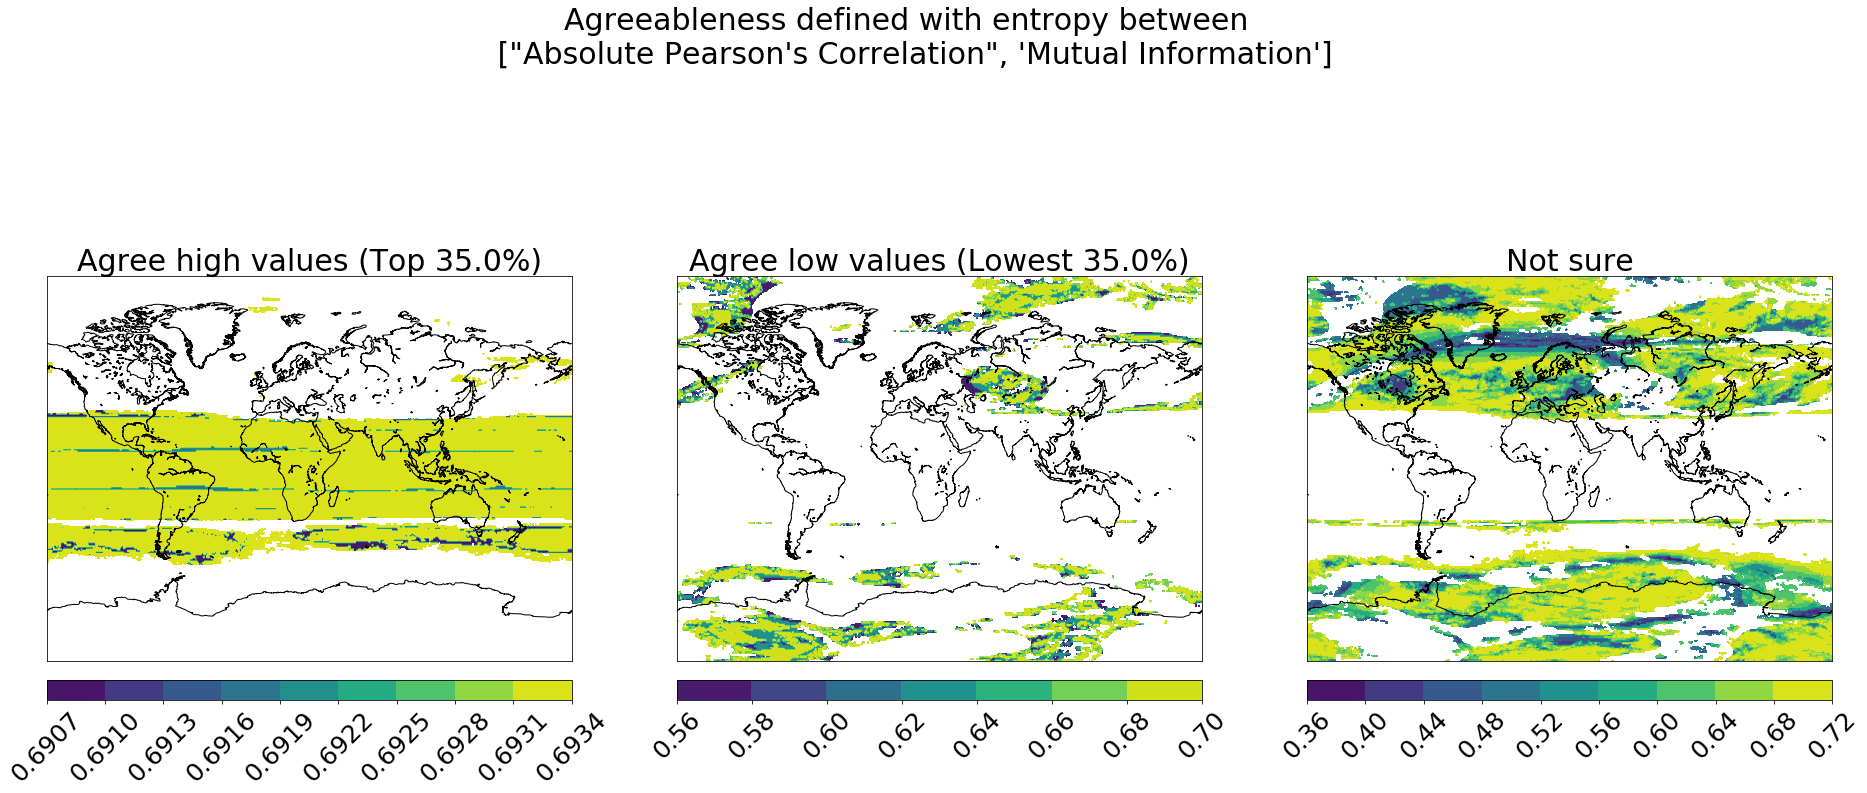

In [10]:
plots.plot_entropy_between_similarity_measures(u_l30, qbo_equator,  measures, measure_labels)